# Nome: João Emanuel da Silva lins
## Matrícula: 162080263

# Support Vector Machine - SVM - Diabetes
###  Disponível em https://www.kaggle.com/uciml/pima-indians-diabetes-database

Attributes:

Pregnancies: Number of times pregnant - Gravidez

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test - Glicose

BloodPressure: Diastolic blood pressure (mm Hg) - Pressão Arterial

SkinThickness: Triceps skin fold thickness (mm)  - Espessura do tríceps

Insulin: 2-Hour serum insulin (mu U/ml) - Insulina

BMI: Body mass index (weight in kg/(height in m)^2) - IMC

DiabetesPedigreeFunction: Diabetes pedigree function - Função que leva em conta doenças na familia

Age: Age (years)

Outcome: Class variable (0 or 1) - 0 : Não tem Diabetes, 1: Possui Diabetes

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("diabetes.csv")
df.rename(columns={"Outcome": "Class"} , inplace=True)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


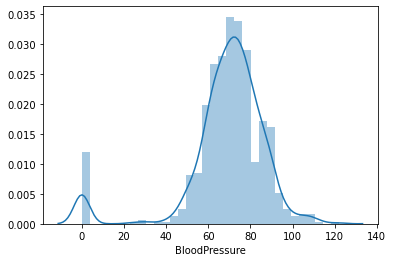

In [4]:
import seaborn as sns
sns.distplot(df.BloodPressure)

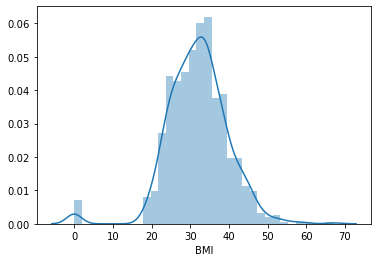

In [5]:
sns.distplot(df.BMI)

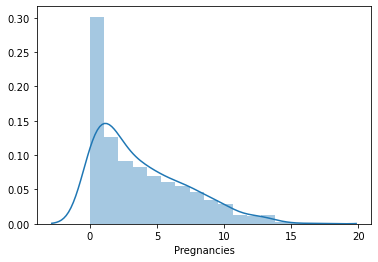

In [6]:
sns.distplot(df.Pregnancies)

## Preparação dos dados

In [7]:
# particionar os conjuntos de treino e teste
from sklearn.model_selection import train_test_split

df2 = df.copy()

diabetes_data = df2.loc[:,["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
                       "BMI", "DiabetesPedigreeFunction", "Age"]]
diabetes_target = df2["Class"]

In [8]:
diabetes_data[:3]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32


In [9]:
diabetes_target[:3]

0    1
1    0
2    1
Name: Class, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    diabetes_data, diabetes_target, test_size=0.33, random_state=42)

X_train[:3]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
464,10,115,98,0,0,24.0,1.022,34
223,7,142,60,33,190,28.8,0.687,61
393,4,116,72,12,87,22.1,0.463,37


In [11]:
print("# dados de treino = ", len(X_train))
print("# dados de teste = ", len(X_test))    

# dados de treino =  514
# dados de teste =  254


In [12]:
diabetes_data[:3]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32


In [13]:
diabetes = diabetes_data
diabetes["class"] = diabetes_target
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
# correlação
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,class
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [15]:
diabetes.corr().loc["class"].sort_values()

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
class                       1.000000
Name: class, dtype: float64

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn import svm

In [17]:
classifier = svm.SVC(kernel='linear')

In [18]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [19]:
prediction_SVM = classifier.predict(X_test)

In [20]:
#kernel_svm.fit(data_train, targets_train)
#kernel_svm_score = kernel_svm.score(data_test, targets_test)

print("Accuracy on test set (SVM): {:.3f}".format(classifier.score(X_test, y_test)))

Accuracy on test set (SVM): 0.756


In [21]:
cm = confusion_matrix(y_test, prediction_SVM)
cm

array([[139,  29],
       [ 33,  53]], dtype=int64)

## comparação com KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)
#print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set (Knn): {:.3f}".format(model.score(X_test, y_test)))

Accuracy on test set (Knn): 0.701


In [23]:
import sklearn.metrics as metrics

metrics.confusion_matrix(y_test, model.predict(X_test))

array([[130,  38],
       [ 38,  48]], dtype=int64)

# mudar os parametros do svm

O parâmetro C é um trade off (escolha) entre a incorreta classificação de exemplos de treinamento contra a simplicidade da superfície de decisão. Um C baixo torna a superfície de decisão suave, enquanto um C alto visa classificar todos os exemplos de treinamento corretamente, dando ao modelo liberdade para selecionar mais amostras como vetores de suporte.
O parâmetro gamma define qual é a influência de um único exemplo de treinamento. É um coeficiente de kernel para 'rbf', 'poli' e 'sigmóide'. Se gamma for definido como 'auto' então 1/n_features serão usados. Valores baixos significam 'alta variância' e maior influência do vetor de suporte e valores altos significam 'baixa variância' e os vetores de suporte não possuem grande influência no processo de classificação. Os parâmetros gama podem ser vistos como o inverso do raio de influência de amostras selecionadas pelo modelo como vetores de suporte.



In [108]:
def testar_kernels(kernels):
    for kernel in kernels:
        classifier = svm.SVC(kernel=kernel, C = 10.0, gamma = 0.001)
        if kernel == 'linear':
            classifier = svm.SVC(kernel=kernel)
        else:
            classifier = svm.SVC(kernel=kernel, C = 10.0, gamma = 0.001 )
        classifier.fit(X_train, y_train)
        prediction_SVM = classifier.predict(X_test)
        cm = confusion_matrix(y_test, prediction_SVM)
        #cm = confusion_matrix(y_test, prediction_SVM)
        print("kernel",kernel)
        print("confusion matrix:\n",cm)
        print("score:", classifier.score(X_test, y_test))
        print("\n")
kernels = ['linear', 'rbf', 'sigmoid']
#['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
# o tempo de processamento do kernel polinomial é alto em relação aos demais
testar_kernels(kernels)

kernel linear
confusion matrix:
 [[139  29]
 [ 33  53]]
score: 0.7559055118110236


kernel rbf
confusion matrix:
 [[135  33]
 [ 38  48]]
score: 0.7204724409448819


kernel sigmoid
confusion matrix:
 [[168   0]
 [ 86   0]]
score: 0.6614173228346457




## Normalizar os dados 
 aumenta a acurácia do modelo
 
valores são transpostos para o intervalo 0-1

In [109]:
diabetes_data = diabetes_data.loc[:, ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
                       "BMI", "DiabetesPedigreeFunction", "Age"] ]
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [110]:
# normalize the data attributes
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(diabetes_data)
df_normalized = pd.DataFrame(np_scaled)
df_normalized.columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin",
                       "BMI", "DiabetesPedigreeFunction", "Age"]
df_normalized.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [111]:
diabetes_target[:3]

0    1
1    0
2    1
Name: Class, dtype: int64

In [112]:
X_train, X_test, y_train, y_test = train_test_split(
    df_normalized, diabetes_target, test_size=0.33, random_state=42)
X_train[:3]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
464,0.588235,0.577889,0.803279,0.000000,0.000000,0.357675,0.403074,0.216667
223,0.411765,0.713568,0.491803,0.333333,0.224586,0.429210,0.260034,0.666667
393,0.235294,0.582915,0.590164,0.121212,0.102837,0.329359,0.164389,0.266667


In [113]:
classifier = svm.SVC(kernel='linear', C=10.0, gamma=0.001)

In [114]:
classifier.fit(X_train, y_train)

SVC(C=10.0, gamma=0.001, kernel='linear')

In [115]:
prediction_SVM = classifier.predict(X_test)

In [116]:
cm = confusion_matrix(y_test, prediction_SVM)
cm

array([[137,  31],
       [ 33,  53]], dtype=int64)

kernel linear
confusion matrix:
 [[139  29]
 [ 33  53]]
score: 0.7559055118110236

In [117]:
classifier.score(X_test, y_test)

0.7480314960629921

In [118]:
kernels = ['linear', 'rbf', 'sigmoid']
testar_kernels(kernels)

kernel linear
confusion matrix:
 [[141  27]
 [ 37  49]]
score: 0.7480314960629921


kernel rbf
confusion matrix:
 [[168   0]
 [ 86   0]]
score: 0.6614173228346457


kernel sigmoid
confusion matrix:
 [[168   0]
 [ 86   0]]
score: 0.6614173228346457




## SVM - Cancer

In [119]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

list(data.target_names)

['malignant', 'benign']

'malignant': 0, 'benign':1

Breast Cancer Wisconsin (Diagnostic) Database
=============================================

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant (0)
                - WDBC-Benign (1)

In [120]:
df = pd.DataFrame(data.data)
df.columns = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']
df["class"] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [121]:
len(data.data)

569

In [122]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [123]:
import numpy as np
np.set_printoptions(suppress=True, precision=3)
data.data

array([[ 17.99 ,  10.38 , 122.8  , ...,   0.265,   0.46 ,   0.119],
       [ 20.57 ,  17.77 , 132.9  , ...,   0.186,   0.275,   0.089],
       [ 19.69 ,  21.25 , 130.   , ...,   0.243,   0.361,   0.088],
       ...,
       [ 16.6  ,  28.08 , 108.3  , ...,   0.142,   0.222,   0.078],
       [ 20.6  ,  29.33 , 140.1  , ...,   0.265,   0.409,   0.124],
       [  7.76 ,  24.54 ,  47.92 , ...,   0.   ,   0.287,   0.07 ]])

In [124]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [125]:
data.target[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [126]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'class'],
      dtype='object')

In [127]:
df['class'].value_counts()

1    357
0    212
Name: class, dtype: int64

In [128]:
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.33, random_state=42)

In [129]:
classifier = svm.SVC(kernel='linear', C=10.0, gamma=0.001)

In [130]:
classifier.fit(X_train, y_train)

SVC(C=10.0, gamma=0.001, kernel='linear')

In [131]:
prediction_SVM = classifier.predict(X_test)

In [132]:
cm = confusion_matrix(y_test, prediction_SVM)
cm

array([[ 63,   4],
       [  7, 114]], dtype=int64)

In [133]:
classifier.score(X_test, y_test)

0.9414893617021277

In [134]:
testar_kernels(kernels)

kernel linear
confusion matrix:
 [[ 63   4]
 [  4 117]]
score: 0.9574468085106383


kernel rbf
confusion matrix:
 [[ 64   3]
 [ 13 108]]
score: 0.9148936170212766


kernel sigmoid
confusion matrix:
 [[  0  67]
 [  0 121]]
score: 0.6436170212765957




### normalizar

In [135]:
np_scaled = min_max_scaler.fit_transform(data.data)

In [136]:
data.data

array([[ 17.99 ,  10.38 , 122.8  , ...,   0.265,   0.46 ,   0.119],
       [ 20.57 ,  17.77 , 132.9  , ...,   0.186,   0.275,   0.089],
       [ 19.69 ,  21.25 , 130.   , ...,   0.243,   0.361,   0.088],
       ...,
       [ 16.6  ,  28.08 , 108.3  , ...,   0.142,   0.222,   0.078],
       [ 20.6  ,  29.33 , 140.1  , ...,   0.265,   0.409,   0.124],
       [  7.76 ,  24.54 ,  47.92 , ...,   0.   ,   0.287,   0.07 ]])

In [137]:
np_scaled

array([[0.521, 0.023, 0.546, ..., 0.912, 0.598, 0.419],
       [0.643, 0.273, 0.616, ..., 0.639, 0.234, 0.223],
       [0.601, 0.39 , 0.596, ..., 0.835, 0.404, 0.213],
       ...,
       [0.455, 0.621, 0.446, ..., 0.487, 0.129, 0.152],
       [0.645, 0.664, 0.666, ..., 0.911, 0.497, 0.452],
       [0.037, 0.502, 0.029, ..., 0.   , 0.257, 0.101]])

In [138]:
X_train, X_test, y_train, y_test = train_test_split(
    np_scaled, data.target, test_size=0.33, random_state=42)

In [139]:
classifier.fit(X_train, y_train)

SVC(C=10.0, gamma=0.001, kernel='linear')

In [140]:
classifier.score(X_test, y_test)

0.9840425531914894

In [141]:
kernel linear
confusion matrix:
 [[ 63   4]
 [  4 117]]
score: 0.9574468085106383

SyntaxError: invalid syntax (<ipython-input-141-f84f1215e81c>, line 1)

In [142]:
testar_kernels(kernels)

kernel linear
confusion matrix:
 [[ 65   2]
 [  1 120]]
score: 0.9840425531914894


kernel rbf
confusion matrix:
 [[ 51  16]
 [  0 121]]
score: 0.9148936170212766


kernel sigmoid
confusion matrix:
 [[ 40  27]
 [  0 121]]
score: 0.8563829787234043




# SVM - Carros

In [143]:
import pandas as pd

df = pd.read_csv("car.data")
df.columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "Class"]
df.head()

,buying,maint,doors,persons,lug_boot,safety,Class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [144]:
len(df)

1727

In [145]:
df.Class.value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: Class, dtype: int64

### Encoder - Decoder

In [146]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

categorias = ["vhigh", "high", "med", "low"]

le = LabelEncoder()

categorias_convertidas_inteiro = le.fit_transform(categorias)
print(categorias_convertidas_inteiro)

[3 0 2 1]


In [147]:
# Decodificar
print(le.inverse_transform(categorias_convertidas_inteiro))

['vhigh' 'high' 'med' 'low']


In [148]:
lv = [ 1, 0, 0, 3]
#lv = [3, 0, 2, 1]
print(le.inverse_transform(lv))

['low' 'high' 'high' 'vhigh']


In [149]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

le_buying = LabelEncoder()
#le_buying.fit(["vhigh", "high", "med", "low"])
print(le.fit_transform(["vhigh", "high", "med", "low"]))

dataset =  [ [1, 1, 1, 0], 
             [3, 0, 2, 1]
           ]

dataset = np.array(dataset)
           
for tupla in dataset:
    print(list(le.inverse_transform(tupla)))

[3 0 2 1]
['low', 'low', 'low', 'high']
['vhigh', 'high', 'med', 'low']


## Codificar os dados categóricos para inteiros

In [150]:
# codifica todo o dataframe para numérico
from sklearn.preprocessing import LabelEncoder
def codificar_dataframe(df):
    le = LabelEncoder()
    df2 = pd.DataFrame()
    for col in df.columns.values:
        # Encoding only categorical variables
        #print(len(df2[col]))
        if df[col].dtypes=='object':
            data=df[col]
            le.fit(data.values)
            #print (data.values)
            #print(le.fit(data.values))
            df2[col]=le.transform(df[col])           
            
    # gerar os dicionarios das categorias e dos inteiros
    dict_scalar ={}
    dict_to_string = {}
    d = {}
    columns = df.columns.values.tolist()
    #print(type(columns))
    #print(columns)
    for col in columns:
        #print(col)
        values = list(set(df[col]))
        #print (values)
        le = LabelEncoder()
        vt = le.fit_transform(values)
        #print(le.transform(values))
        dict_scalar[col] = {}
        dict_to_string[col] = {}
        d = {}
        ds = {}
        for v, vt in zip(values, vt): 
            #print (v,vt)
            d[v] = vt
            ds[vt] = v
        dict_scalar[col] = d
        dict_to_string[col] = ds
        
    return(df2, dict_scalar, dict_to_string)


def decodificar_dataframe(df2, dict_to_string):
    df3 = pd.DataFrame()
    columns = df2.columns.values.tolist()
    for col in columns:
        df3[col] = df2[col].map(dict_to_string[col])
    return (df3)

In [151]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,Class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [152]:
df_cod, dict_nomes, dict_int = codificar_dataframe(df)
df_cod.head()

,buying,maint,doors,persons,lug_boot,safety,Class
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


In [153]:
len(df_cod)

1727

In [154]:
df_dec = decodificar_dataframe(df_cod, dict_int)
df_dec.head()

,buying,maint,doors,persons,lug_boot,safety,Class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [155]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,Class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


## Separar os dados X e Y

In [156]:
data_x = df_cod.loc[:,["buying", "maint", "doors", "persons", "lug_boot", "safety"]]
data_x.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,2
1,3,3,0,0,2,0
2,3,3,0,0,1,1
3,3,3,0,0,1,2
4,3,3,0,0,1,0


In [157]:
target_y = df_cod.loc[:,"Class"]
len(target_y)

1727

In [158]:
X_train, X_test, y_train, y_test = train_test_split(data_x, target_y, test_size=0.33, random_state=42)

In [159]:
classifier = svm.SVC(kernel='linear', C=10.0, gamma=0.001)

In [160]:
classifier.fit(X_train, y_train)

SVC(C=10.0, gamma=0.001, kernel='linear')

In [161]:
prediction_SVM = classifier.predict(X_test)

In [162]:
df.Class.value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: Class, dtype: int64

In [163]:
cm = confusion_matrix(y_test, prediction_SVM)
cm

array([[ 23,   0, 104,   0],
       [  0,   0,  18,   0],
       [  6,   0, 393,   0],
       [ 15,   0,  11,   0]], dtype=int64)

In [164]:
classifier.score(X_test, y_test)

0.7298245614035088

In [165]:
print("Vetores de suporte: ", len(classifier.support_vectors_))
classifier.support_vectors_

Vetores de suporte:  734


array([[1., 0., 3., 2., 1., 2.],
       [1., 0., 1., 1., 2., 2.],
       [3., 1., 0., 2., 1., 0.],
       ...,
       [1., 1., 2., 1., 1., 0.],
       [2., 2., 1., 1., 0., 0.],
       [2., 1., 3., 2., 0., 0.]])

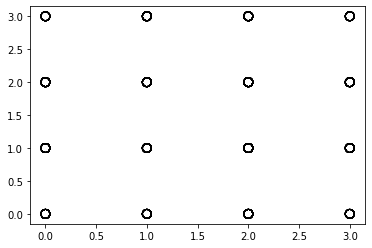

In [166]:
import matplotlib.pyplot as plt
clf = classifier
#plt.clf()
#plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1]) #, s=80, facecolors='none', zorder=10)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10, edgecolors='k')
#plt.scatter(clf.support_, clf.support_)
#plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired)
plt.show()

In [167]:
clf.support_[:4]

array([ 7, 10, 14, 18])

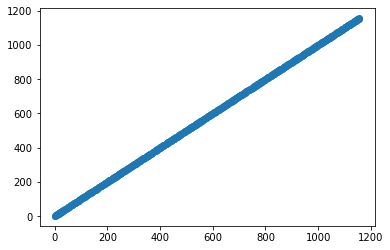

In [168]:
plt.scatter(clf.support_, clf.support_) #, s=80, facecolors='none', zorder=10)
#plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired)
plt.show()

In [169]:
testar_kernels(kernels)

kernel linear
confusion matrix:
 [[ 20   0 107   0]
 [  0   0  18   0]
 [  5   0 394   0]
 [ 13   0  13   0]]
score: 0.7263157894736842


kernel rbf
confusion matrix:
 [[  0   0 127   0]
 [  0   0  18   0]
 [  0   0 399   0]
 [  0   0  26   0]]
score: 0.7


kernel sigmoid
confusion matrix:
 [[  0   0 127   0]
 [  0   0  18   0]
 [  0   0 399   0]
 [  0   0  26   0]]
score: 0.7




In [170]:
## Normalizar

In [171]:
np_scaled = min_max_scaler.fit_transform(data_x)

In [172]:
np_scaled[:3]

array([[1. , 1. , 0. , 0. , 1. , 1. ],
       [1. , 1. , 0. , 0. , 1. , 0. ],
       [1. , 1. , 0. , 0. , 0.5, 0.5]])

In [173]:
X_train, X_test, y_train, y_test = train_test_split(np_scaled, target_y, test_size=0.33, random_state=42)

In [174]:
testar_kernels(kernels)

kernel linear
confusion matrix:
 [[  5   0 122   0]
 [  0   0  18   0]
 [  2   0 397   0]
 [  2   0  24   0]]
score: 0.7052631578947368


kernel rbf
confusion matrix:
 [[  0   0 127   0]
 [  0   0  18   0]
 [  0   0 399   0]
 [  0   0  26   0]]
score: 0.7


kernel sigmoid
confusion matrix:
 [[  0   0 127   0]
 [  0   0  18   0]
 [  0   0 399   0]
 [  0   0  26   0]]
score: 0.7




# Kernels - Plots

kernel:  linear
kernel:  poly
kernel:  rbf


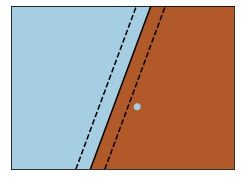

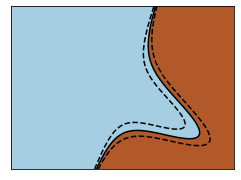

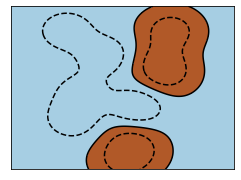

In [175]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


# Atributos e variável target
X = np.c_[(.4, -.7),
          (-1.5, -1),
          (-1.4, -.9),
          (-1.3, -1.2),
          (-1.1, -.2),
          (-1.2, -.4),
          (-.5, 1.2),
          (-1.5, 2.1),
          (1, 1),
          # --
          (1.3, .8),
          (1.2, .5),
          (.2, -2),
          (.5, -2.4),
          (.2, -2.3),
          (0, -2.7),
          (1.3, 2.1)].T
Y = [0] * 8 + [1] * 8

fignum = 1

# Modelo e Fit com 3 kernels
for kernel in ('linear', 'poly', 'rbf'):
    clf = svm.SVC(kernel = kernel, gamma = 2)
    clf.fit(X, Y)

    # Plot da linha com vetores de suporte mais próximos
    print("kernel: ", kernel)
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80, facecolors='none', zorder=10)
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired)

    plt.axis('tight')
    x_min = -3
    x_max = 3
    y_min = -3
    y_max = 3

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Color Plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-.5, 0, .5])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1
    
plt.show()

## Hyperparameter Tuning

A escolha de C e de gamma é importante performance das SVMs.
A otimização (tuning) dos hyperparâmetros é uma boa prática para enoontrar bons parâmetros.


In [176]:
# dataset diabetes
X = diabetes_data.values
Y = diabetes_target.values
X_train, X_test, y_train, y_test = train_test_split(
    diabetes_data, diabetes_target, test_size=0.33, random_state=42)

In [177]:
kernel = 'linear'
#classifier = svm.SVC(kernel=kernel, C = 10.0, gamma = 0.001)
classifier = svm.SVC(kernel=kernel)
classifier.fit(X_train, y_train)
prediction_SVM = classifier.predict(X_test)
cm = confusion_matrix(y_test, prediction_SVM)
#cm = confusion_matrix(y_test, prediction_SVM)
print("kernel",kernel)
print("confusion matrix:\n",cm)
print("score:", classifier.score(X_test, y_test))
print("\n")

kernel linear
confusion matrix:
 [[139  29]
 [ 33  53]]
score: 0.7559055118110236




In [178]:
kernels = ['linear', 'rbf', 'sigmoid']
kernel = 'rbf'
#classifier = svm.SVC(kernel=kernel, C = 10.0, gamma = 0.001)
classifier = svm.SVC(kernel=kernel,C = 10.0, gamma = 0.001)
classifier.fit(X_train, y_train)
prediction_SVM = classifier.predict(X_test)
cm = confusion_matrix(y_test, prediction_SVM)
#cm = confusion_matrix(y_test, prediction_SVM)
print("kernel",kernel)
print("confusion matrix:\n",cm)
print("score:", classifier.score(X_test, y_test))
print("\n")

kernel rbf
confusion matrix:
 [[135  33]
 [ 38  48]]
score: 0.7204724409448819




In [179]:
np.arange(-15, 5, step=2)

array([-15, -13, -11,  -9,  -7,  -5,  -3,  -1,   1,   3])

In [180]:
import numpy as np

2. **  np.arange(-15, 5, step=2)

array([0.   , 0.   , 0.   , 0.002, 0.008, 0.031, 0.125, 0.5  , 2.   ,
       8.   ])

In [181]:
np.set_printoptions(precision=1, suppress=True)
g_range = 2. ** np.arange(-15, 5, step=2)
C_range = 2. ** np.arange(-5, 15, step=2)
g_range

array([0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.5, 2. , 8. ])

In [182]:
C_range

array([   0. ,    0.1,    0.5,    2. ,    8. ,   32. ,  128. ,  512. ,
       2048. , 8192. ])

In [183]:
#from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
#import sklearn.cross_validation as cv
#  gamma and C (Cost)  hyperparametros
  g_range = 2. ** np.arange(-15, 5, step=2)
  C_range = 2. ** np.arange(-5, 15, step=2)

grid = [{'gamma': g_range, 'C': C_range}]

gridcv = GridSearchCV(svm.SVC(kernel='rbf'), param_grid=grid, cv= 5) #cv.KFold(n=X_train.shape[0], n_folds=5))
gridcv.fit(X_train, y_train)

bestGamma = gridcv.best_params_['gamma']
bestC = gridcv.best_params_['C']

print ("Os melhores paRâmetros: gamma=", bestGamma, " and Cost=", bestC)

Os melhores paRâmetros: gamma= 3.0517578125e-05  and Cost= 8.0


In [192]:
classifier = svm.SVC(kernel='rbf', C=8, gamma=3.0517578125e-05)
classifier.fit(X_train, y_train)
prediction_SVM = classifier.predict(X_test)
cm = confusion_matrix(y_test, prediction_SVM)
#cm = confusion_matrix(y_test, prediction_SVM)
print("kernel",kernel)
print("confusion matrix:\n",cm)
print("score:", classifier.score(X_test, y_test))
print("\n")

kernel rbf
confusion matrix:
 [[143  25]
 [ 39  47]]
score: 0.7480314960629921




In [185]:
gridcv

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': array([   0. ,    0.1,    0.5,    2. ,    8. ,   32. ,  128. ,  512. ,
       2048. , 8192. ]),
                          'gamma': array([0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0.5, 2. , 8. ])}])

In [186]:
gridcv.cv_results_

{'mean_fit_time': array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1,
        0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]),
 'std_fit_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0

In [187]:
scores = gridcv.cv_results_['mean_test_score']

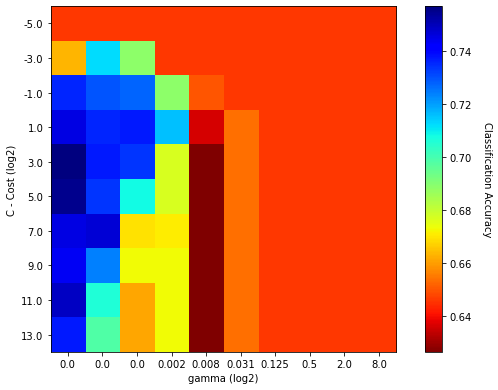

In [188]:
# plot the scores of the grid
# grid_scores_ contains parameter settings and scores
scores = np.array(scores).reshape(len(C_range), len(g_range))

# Make a heatmap with the performance
plt.figure(figsize=(10, 6))
plt.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', origin='upper', cmap=plt.cm.get_cmap('jet_r')) # higher
plt.xlabel('gamma (log2)')
plt.ylabel('C - Cost (log2)')
plt.xticks(np.arange(len(g_range)), np.round(g_range,3) )
plt.yticks(np.arange(len(C_range)), np.log2((C_range)))

cbar = plt.colorbar()
cbar.set_label('Classification Accuracy', rotation=270, labelpad=20)

plt.show()

### Exercício: Usar o GridSearch para o gamma e o C e plotar

In [189]:
g_range = 1.2 ** np.arange(-15, 5, step=2)
C_range = 1.5 ** np.arange(-5, 15, step=2)

In [190]:
g_range

array([0.1, 0.1, 0.1, 0.2, 0.3, 0.4, 0.6, 0.8, 1.2, 1.7])

In [191]:
C_range

array([  0.1,   0.3,   0.7,   1.5,   3.4,   7.6,  17.1,  38.4,  86.5,
       194.6])

In [200]:
#from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
#import sklearn.cross_validation as cv
#  gamma and C (Cost)  hyperparametros
g_range = 1.2 ** np.arange(-15, 5, step=2)
C_range = 1.5 ** np.arange(-5, 15, step=2)

grid = [{'gamma': g_range, 'C': C_range}]

gridcv = GridSearchCV(svm.SVC(kernel='rbf'), param_grid=grid, cv= 5) #cv.KFold(n=X_train.shape[0], n_folds=5))
gridcv.fit(X_train, y_train)

bestGamma = gridcv.best_params_['gamma']
bestC = gridcv.best_params_['C']

print ("Os melhores paRâmetros: gamma=", bestGamma, " and Cost=", bestC)

Os melhores paRâmetros: gamma= 0.0649054715188745  and Cost= 0.13168724279835392


In [201]:
classifier = svm.SVC(kernel='rbf', C=8, gamma=3.0517578125e-05)
classifier.fit(X_train, y_train)
prediction_SVM = classifier.predict(X_test)
cm = confusion_matrix(y_test, prediction_SVM)
#cm = confusion_matrix(y_test, prediction_SVM)
print("kernel",kernel)
print("confusion matrix:\n",cm)
print("score:", classifier.score(X_test, y_test))
print("\n")

kernel rbf
confusion matrix:
 [[143  25]
 [ 39  47]]
score: 0.7480314960629921




In [202]:
gridcv

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': array([  0.1,   0.3,   0.7,   1.5,   3.4,   7.6,  17.1,  38.4,  86.5,
       194.6]),
                          'gamma': array([0.1, 0.1, 0.1, 0.2, 0.3, 0.4, 0.6, 0.8, 1.2, 1.7])}])

In [203]:
gridcv.cv_results_

{'mean_fit_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'std_fit_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'mean_score_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [204]:
scores = gridcv.cv_results_['mean_test_score']

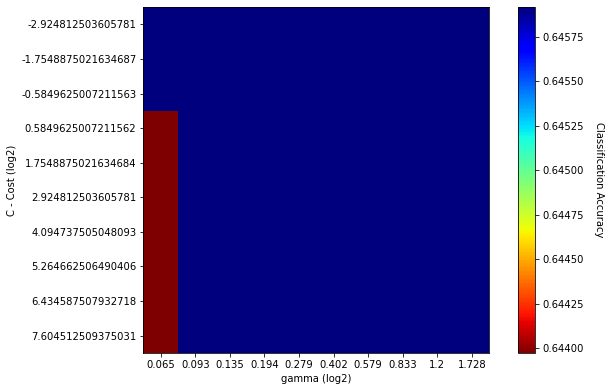

In [205]:
# plot the scores of the grid
# grid_scores_ contains parameter settings and scores
scores = np.array(scores).reshape(len(C_range), len(g_range))

# Make a heatmap with the performance
plt.figure(figsize=(10, 6))
plt.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', origin='upper', cmap=plt.cm.get_cmap('jet_r')) # higher
plt.xlabel('gamma (log2)')
plt.ylabel('C - Cost (log2)')
plt.xticks(np.arange(len(g_range)), np.round(g_range,3) )
plt.yticks(np.arange(len(C_range)), np.log2((C_range)))

cbar = plt.colorbar()
cbar.set_label('Classification Accuracy', rotation=270, labelpad=20)

plt.show()